In [13]:
### Run this cell before continuing.
library(repr)
library(tidyverse)
library(testthat)
library(digest)
library(caret)
library(plotly)


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [14]:
df <- read_csv("Pokemon_new.csv")
df

Parsed with column specification:
cols(
  `#` = col_integer(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_integer(),
  HP = col_integer(),
  Attack = col_integer(),
  Defense = col_integer(),
  `Sp. Atk` = col_integer(),
  `Sp. Def` = col_integer(),
  Speed = col_integer(),
  Generation = col_integer(),
  Legendary = col_integer()
)


#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,0
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,0
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,0
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,0
7,Squirtle,Water,NA,314,44,48,65,50,64,43,1,0


In [15]:

dfnew<- data.frame(df$HP, df$Attack, df$Defense, 
            df$`Sp. Atk`, df$`Sp. Def`, df$Speed, df$Legendary)
dfnew

df.HP,df.Attack,df.Defense,df..Sp..Atk.,df..Sp..Def.,df.Speed,df.Legendary
45,49,49,65,65,45,0
60,62,63,80,80,60,0
80,82,83,100,100,80,0
80,100,123,122,120,80,0
39,52,43,60,50,65,0
58,64,58,80,65,80,0
78,84,78,109,85,100,0
78,130,111,130,85,100,0
78,104,78,159,115,100,0
44,48,65,50,64,43,0


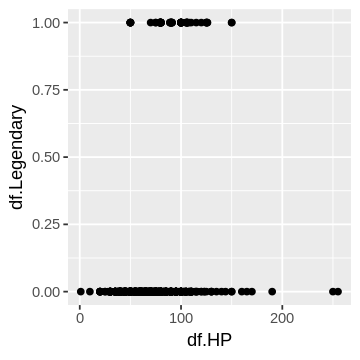

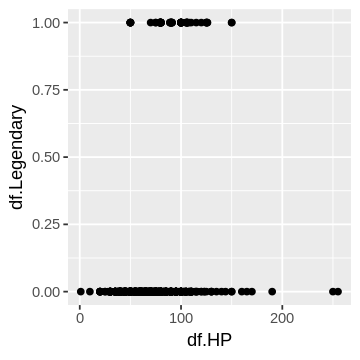

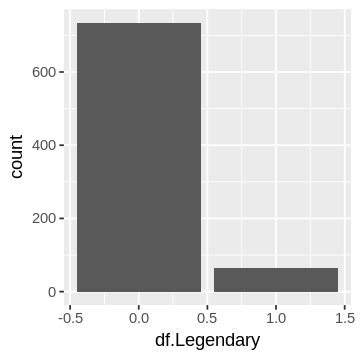

In [34]:
options(repr.plot.width = 3, repr.plot.height = 3)

hp_leg <- dfnew %>% ggplot(aes(x = df.HP, y = df.Legendary)) + geom_point()
hp_leg

hp_leg <- dfnew %>% ggplot(aes(x = df.HP, y = df.Legendary)) + geom_point()
hp_leg

#The break down of Legendary vs Normal Pokemon
g <- dfnew %>% ggplot(aes(df.Legendary))+ geom_bar()
g

#average of stats between the two 

g <- dfnew %>%
    ggplot(aes())


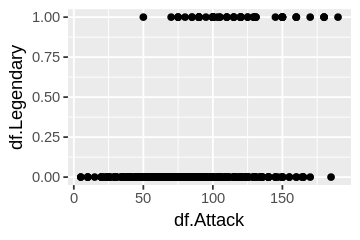

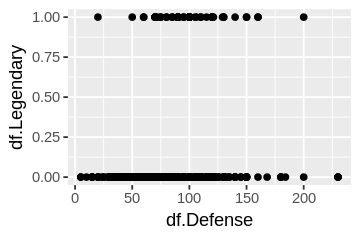

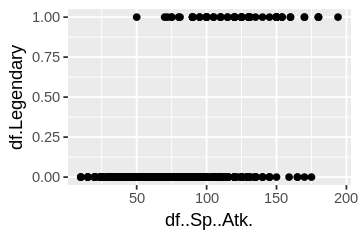

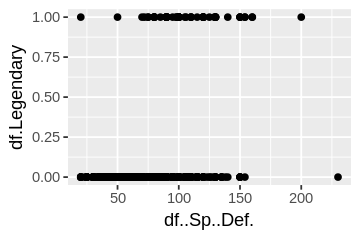

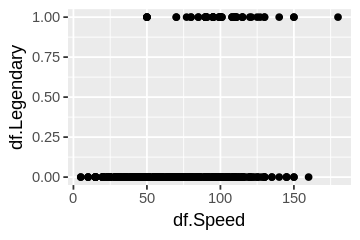

In [26]:
par(mfrow = c(2, 3))
# just some plots to test out different variables with legendary/non-legendary pokemons
options(repr.plot.width = 3, repr.plot.height = 2)
atk <- dfnew %>% ggplot(aes(x = df.Attack, y = df.Legendary)) + geom_point()
atk

def <- dfnew %>% ggplot(aes(x = df.Defense, y = df.Legendary)) + geom_point()
def

atk_sp <- dfnew %>% ggplot(aes(x = df..Sp..Atk., y = df.Legendary)) + geom_point()
atk_sp

def_sp <- dfnew %>% ggplot(aes(x = df..Sp..Def., y = df.Legendary)) + geom_point()
def_sp

sp <- dfnew %>% ggplot(aes(x = df.Speed, y = df.Legendary)) + geom_point()
sp

#plot(dfnew$df.Speed, dfnew$Legendary)

In [18]:
corr_metrix <- cor(dfnew)
corr_metrix
#no significant correlation 

,df.HP,df.Attack,df.Defense,df..Sp..Atk.,df..Sp..Def.,df.Speed,df.Legendary
df.HP,1.0000000,0.4223860,0.2396223,0.3623799,0.3787181,0.1759521,0.2736196
df.Attack,0.4223860,1.0000000,0.4386871,0.3963618,0.2639896,0.3812397,0.3454080
df.Defense,0.2396223,0.4386871,1.0000000,0.2235486,0.5107466,0.0152266,0.2463768
df..Sp..Atk.,0.3623799,0.3963618,0.2235486,1.0000000,0.5061214,0.4730179,0.4489073
df..Sp..Def.,0.3787181,0.2639896,0.5107466,0.5061214,1.0000000,0.2591331,0.3639371
df.Speed,0.1759521,0.3812397,0.0152266,0.4730179,0.2591331,1.0000000,0.3267153
df.Legendary,0.2736196,0.3454080,0.2463768,0.4489073,0.3639371,0.3267153,1.0000000


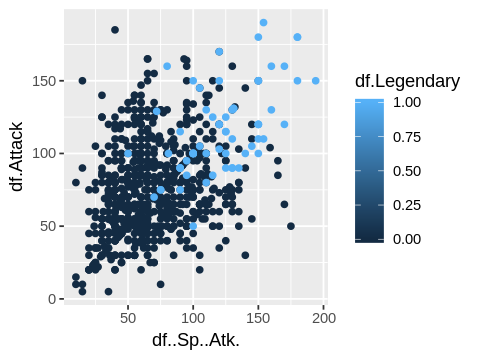

In [19]:
options(repr.plot.width = 4, repr.plot.height = 3)

dfnew %>%
  ggplot(aes(x=df..Sp..Atk., y=df.Attack, color=df.Legendary)) +
  geom_point()

# based on the plots observed above, it seems like attack speed and attack point 
# are the two major variables that determines whether a pokemon is legendary or not

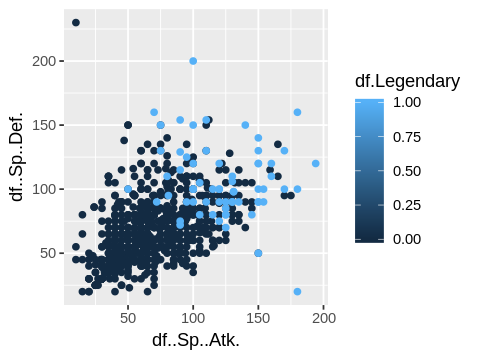

In [20]:
dfnew %>%
  ggplot(aes(x=df..Sp..Atk., y=df..Sp..Def., color=df.Legendary)) +
  geom_point()

# Tried another plot with the 2 most significant variable in the correlation matrix
# it doesn't appear to be better than the plot above